# Style Explorer

This interactive notebook for inspecting and generating style artwork.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline 

import torch
import numpy as np
from IPython.display import display, clear_output
from PIL import Image

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

### Style exploration

In [2]:
import style
st = style.IteratedStyleTransfer()

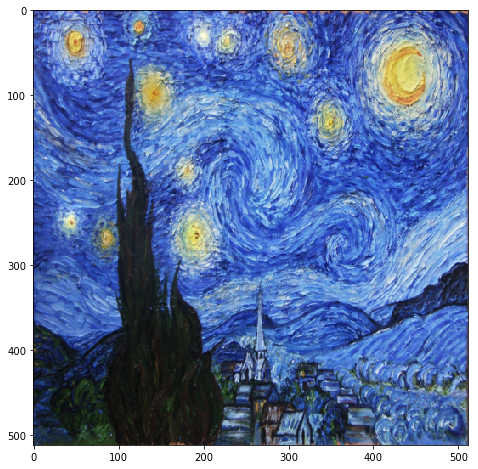

In [3]:
a = Image.open('van_gogh-starry-night.jpg').resize((512,512), resample=Image.BILINEAR)
plt.imshow(a)

In [6]:
style_weights = np.zeros(len(st.conv_ids))
style_weights[0:3] = [0.1, 0.8, 0.1]

p = Image.new('RGB', a.size)

for i in range(len(style_weights)):
    torch.manual_seed(456)
    
    x, _ = st.run(p, a, 4, style_weights, niter=600, lr=1e-2, weight_tv_loss=0, weight_content_loss=0)
    x = style.to_pil_image(x)
    x.save(f'style_{i}.png')
    
    style_weights = np.roll(style_weights, 1)

100%|███████████████████████████████████████| 600/600 [01:22<00:00,  7.30it/s, loss=[0.001 0.    0.001 0.   ], lr=0.01]


## Multiscale

(1222, 889)


100%|███████████████████████████████████████| 200/200 [00:02<00:00, 90.96it/s, loss=[0.002 0.    0.002 0.   ], lr=0.01]


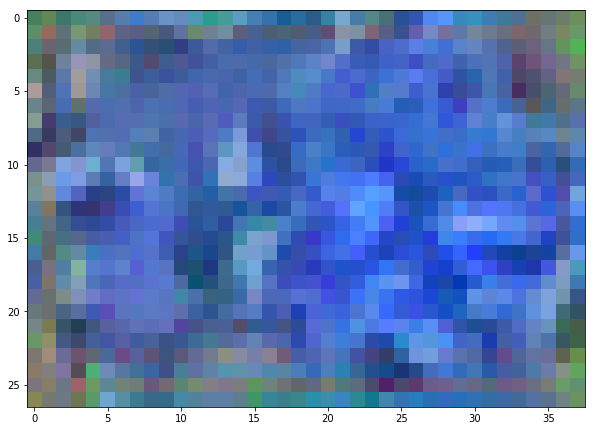

100%|███████████████████████████████████████| 200/200 [00:02<00:00, 73.99it/s, loss=[0.001 0.    0.001 0.   ], lr=0.01]


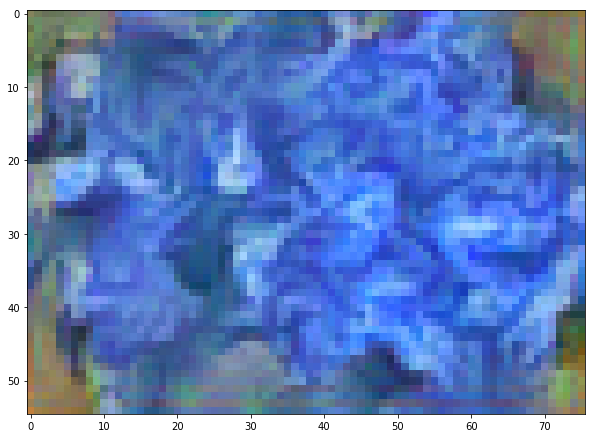

100%|███████████████████████████████████████| 200/200 [00:03<00:00, 50.31it/s, loss=[0.001 0.    0.001 0.   ], lr=0.01]


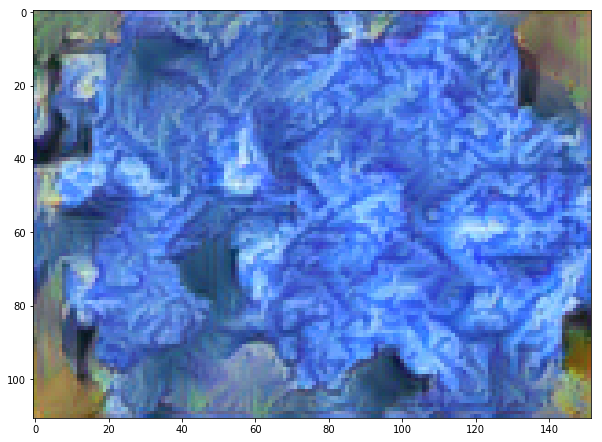

100%|███████████████████████████████████████| 200/200 [00:09<00:00, 20.62it/s, loss=[0.001 0.    0.001 0.   ], lr=0.01]


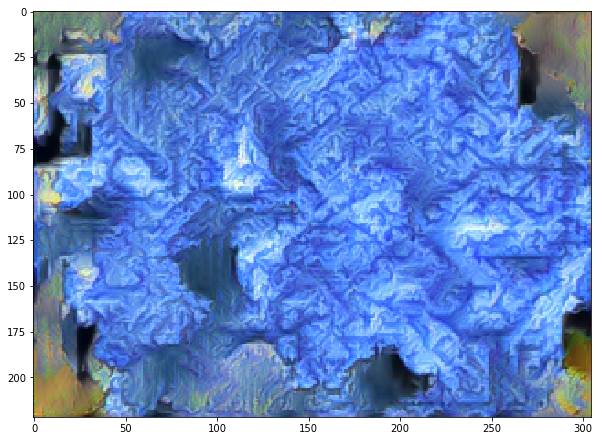

100%|███████████████████████████████████████| 200/200 [00:34<00:00,  5.84it/s, loss=[0.001 0.    0.001 0.   ], lr=0.01]


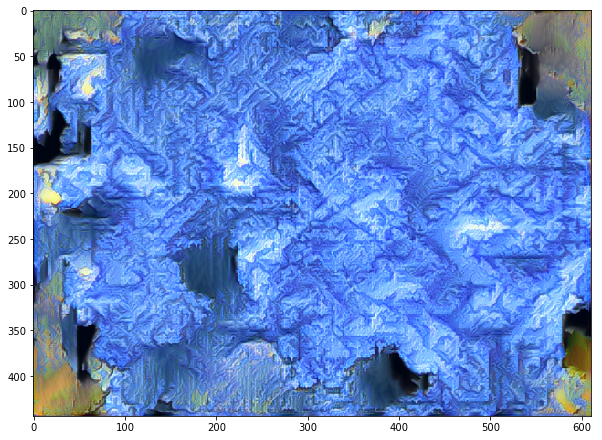

  0%|                                                                                          | 0/200 [00:00<?, ?it/s]


RuntimeError: cuda runtime error (2) : out of memory at c:\users\administrator\downloads\new-builder\win-wheel\pytorch\aten\src\thc\generic/THCStorage.cu:58

In [36]:
#p = Image.open('Golden_Gate_Bridge.jpg')
a = Image.open('van_gogh-starry-night.jpg')
print(a.size)
pyr = style.ImagePyramid(a.size, 6)

c_id = st.conv_ids[8]

style_weights = np.zeros(len(st.conv_ids))
style_weights[0:3] = [0.2, 0.8, 0.2]

x = None
for scaler in pyr.iterate():
    if x is not None:
        x = scaler(x)
    pscaled = Image.new('RGB', scaler.size)
    
    x, _ = st.run(pscaled, ascaled, c_id, style_weights, niter=200, lr=1e-2, x=x, weight_tv_loss=0, weight_content_loss=1e-3)
    x = style.to_pil_image(x)
    
    plt.figure()
    plt.imshow(x)
    plt.show()

In [28]:
x.save('final.png')